In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
df = pd.read_csv('Student_Math_Alcohol.csv')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
df.shape

(395, 33)

In [6]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

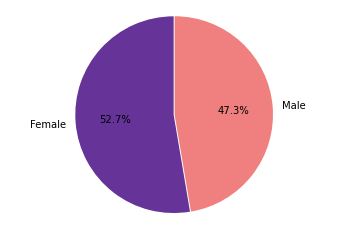

In [7]:
plt.pie(df['sex'].value_counts().tolist(), 
        labels=['Female', 'Male'], colors=['rebeccapurple', 'lightcoral'], 
        autopct='%1.1f%%', explode=[0,0.01], startangle=90)
axis = plt.axis('equal')

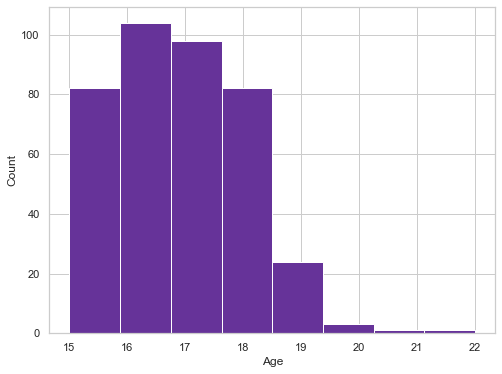

In [8]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df['age'],  
             hist_kws={"alpha": 1, "color": "rebeccapurple"}, 
             kde=False, bins=8)
ax = ax.set(ylabel="Count", xlabel="Age")

Text(0.5, 1.0, 'Relationship status of Parents, Away Vs.Together')

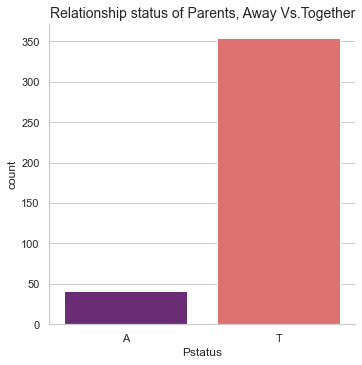

In [9]:
sns.catplot(x="Pstatus", kind="count",palette="magma", data=df, height = 5, legend=True)
plt.title("Relationship status of Parents, Away Vs.Together", fontsize=14)

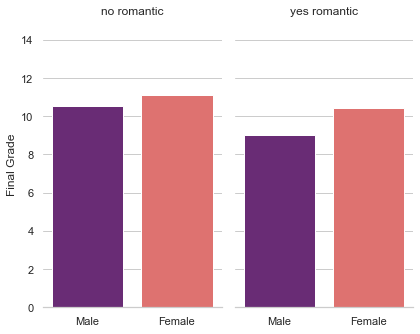

In [10]:
g = sns.catplot(x="sex", y="G3", col="romantic",
                data=df, saturation=.75,
                kind="bar", ci=None, aspect=.6, palette="magma")
(g.set_axis_labels("", "Final Grade")
.set_xticklabels(["Male", "Female"])
.set_titles("{col_name} {col_var}")
.set(ylim=(0, 15))
.despine(left=True))  

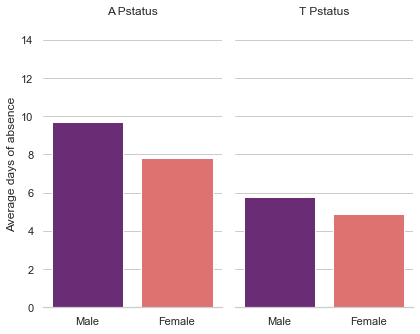

In [11]:
g = sns.catplot(x="sex", y="absences", col="Pstatus",
                data=df, saturation=.75,
                kind="bar", ci=None, aspect=.6, palette="magma")
(g.set_axis_labels("", "Average days of absence")
.set_xticklabels(["Male", "Female"])
.set_titles("{col_name} {col_var}")
.set(ylim=(0, 15))
.despine(left=True))

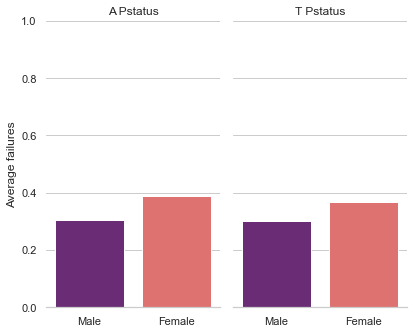

In [12]:
g = sns.catplot(x="sex", y="failures", col="Pstatus",
                data=df, saturation=.75,
                kind="bar", ci=None, aspect=.6, palette="magma")
(g.set_axis_labels("", "Average failures")
.set_xticklabels(["Male", "Female"])
.set_titles("{col_name} {col_var}")
.set(ylim=(0, 1))
.despine(left=True))

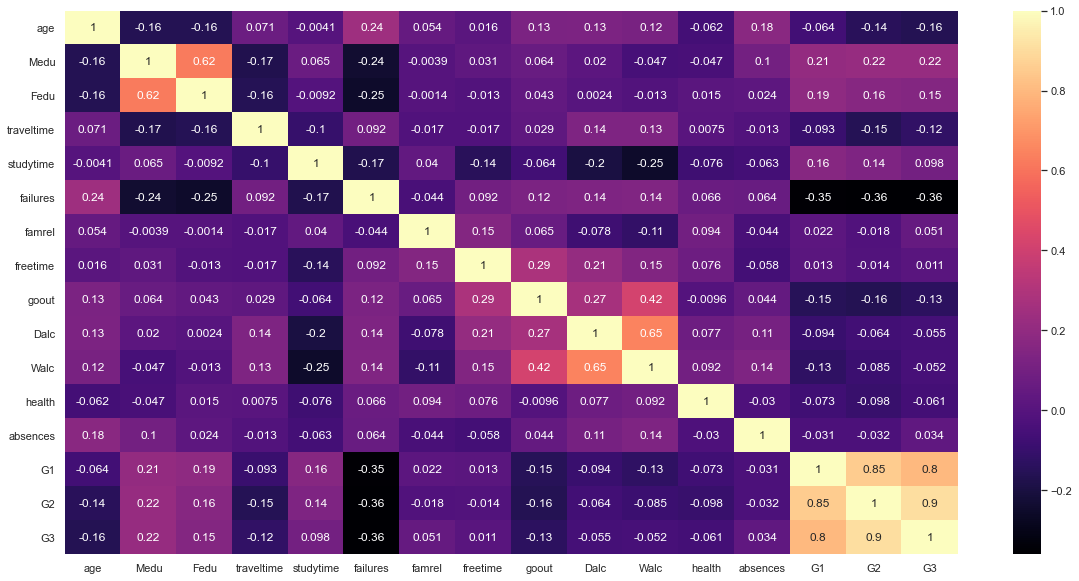

In [13]:
def show_correlations(df, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = df.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True, cmap= "magma")
    return corr

correlation_df = show_correlations(df,show_chart=True)

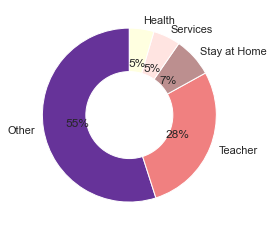

In [14]:
plt.pie(df['Fjob'].value_counts().tolist(), 
        labels=['Other', 'Teacher', 'Stay at Home', 'Services', 'Health'], 
        colors=['rebeccapurple', 'lightcoral', 'rosybrown', 'mistyrose', 'lightyellow'], 
         autopct='%1.0f%%', startangle=90)
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

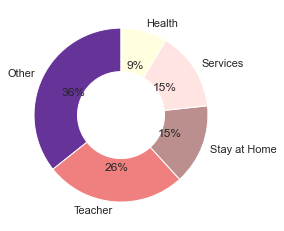

In [15]:
plt.pie(df['Mjob'].value_counts().tolist(), 
        labels=['Other', 'Teacher', 'Stay at Home', 'Services', 'Health'],  
        colors=['rebeccapurple', 'lightcoral', 'rosybrown', 'mistyrose', 'lightyellow'], 
         autopct='%1.0f%%', startangle=90)
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [16]:
pip install squarify 

Note: you may need to restart the kernel to use updated packages.


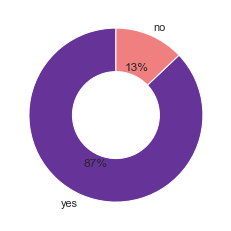

In [17]:
plt.pie(df['schoolsup'].value_counts().tolist(), 
        labels=['yes', 'no'],  
        colors=['rebeccapurple', 'lightcoral'], 
         autopct='%1.0f%%', startangle=90)
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

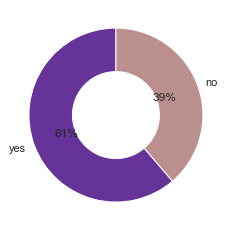

In [18]:
plt.pie(df['famsup'].value_counts().tolist(), 
        labels=['yes', 'no'],  
        colors=['rebeccapurple', 'rosybrown'], 
         autopct='%1.0f%%', startangle=90)
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

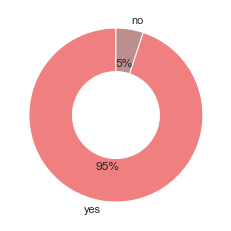

In [19]:
plt.pie(df['higher'].value_counts().tolist(), 
        labels=['yes', 'no'],  
        colors=['lightcoral', 'rosybrown'], 
         autopct='%1.0f%%', startangle=90)
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

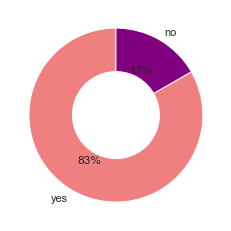

In [20]:
plt.pie(df['internet'].value_counts().tolist(), 
        labels=['yes', 'no'],  
        colors=['lightcoral', 'purple'], 
         autopct='%1.0f%%', startangle=90)
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

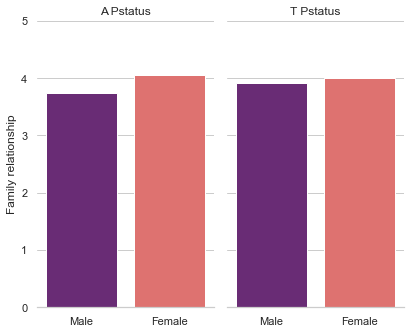

In [21]:
g = sns.catplot(x="sex", y="famrel", col="Pstatus",
                data=df, saturation=.75,
                kind="bar", ci=None, aspect=.6, palette="magma")
(g.set_axis_labels("", "Family relationship")
.set_xticklabels(["Male", "Female"])
.set_titles("{col_name} {col_var}")
.set(ylim=(0, 5))
.despine(left=True))

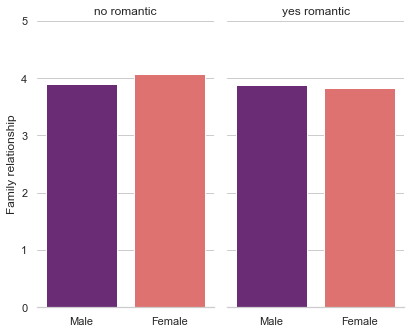

In [22]:
g = sns.catplot(x="sex", y="famrel", col="romantic",
                data=df, saturation=.75,
                kind="bar", ci=None, aspect=.6, palette="magma")
(g.set_axis_labels("", "Family relationship")
.set_xticklabels(["Male", "Female"])
.set_titles("{col_name} {col_var}")
.set(ylim=(0, 5))
.despine(left=True))

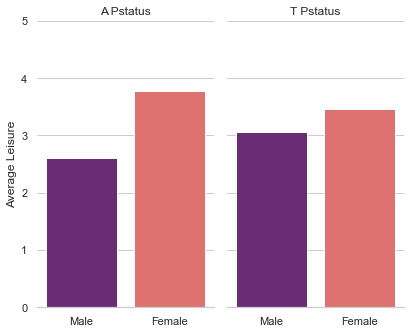

In [23]:
g = sns.catplot(x="sex", y="freetime", col="Pstatus",
                data=df, saturation=.75,
                kind="bar", ci=None, aspect=.6, palette="magma")
(g.set_axis_labels("", "Average Leisure")
.set_xticklabels(["Male", "Female"])
.set_titles("{col_name} {col_var}")
.set(ylim=(0, 5))
.despine(left=True))

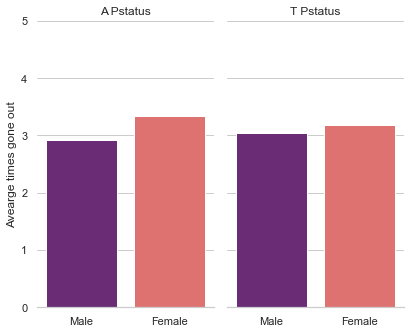

In [24]:
g = sns.catplot(x="sex", y="goout", col="Pstatus",
                data=df, saturation=.75,
                kind="bar", ci=None, aspect=.6, palette="magma")
(g.set_axis_labels("", "Avearge times gone out")
.set_xticklabels(["Male", "Female"])
.set_titles("{col_name} {col_var}")
.set(ylim=(0, 5))
.despine(left=True))

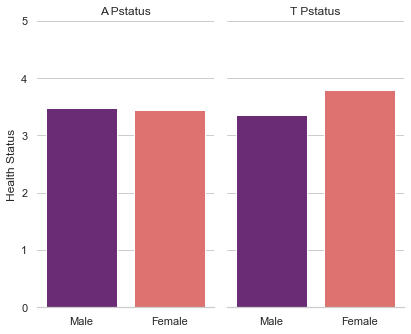

In [25]:
g = sns.catplot(x="sex", y="health", col="Pstatus",
                data=df, saturation=.75,
                kind="bar", ci=None, aspect=.6, palette="magma")
(g.set_axis_labels("", "Health Status")
.set_xticklabels(["Male", "Female"])
.set_titles("{col_name} {col_var}")
.set(ylim=(0, 5))
.despine(left=True))

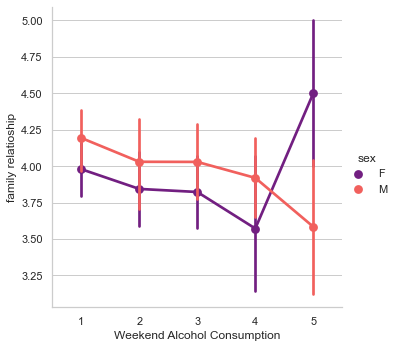

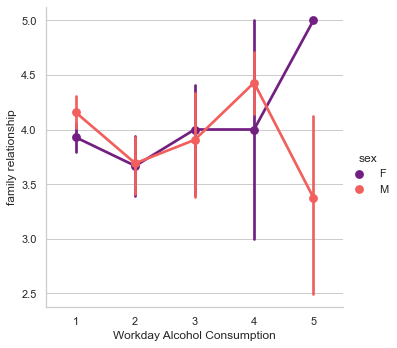

In [26]:
plot1 = sns.factorplot(x="Walc", y="famrel", hue="sex", data=df, palette='magma')
plot1.set(ylabel="family relatioship", xlabel="Weekend Alcohol Consumption")

plot2 = sns.factorplot(x="Dalc", y="famrel", hue="sex", data=df, palette='magma')
plot2.set(ylabel="family relationship", xlabel="Workday Alcohol Consumption")

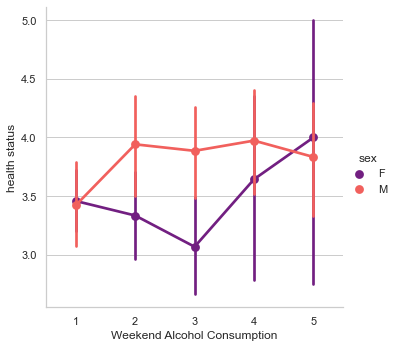

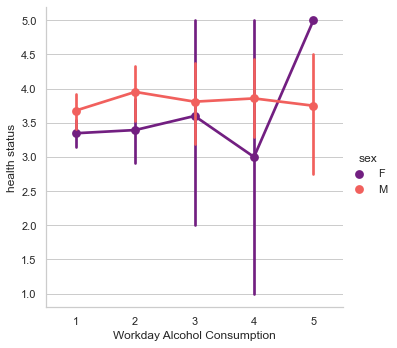

In [27]:
plot1 = sns.factorplot(x="Walc", y="health", hue="sex", data=df, palette='magma')
plot1.set(ylabel="health status", xlabel="Weekend Alcohol Consumption")

plot2 = sns.factorplot(x="Dalc", y="health", hue="sex", data=df, palette='magma')
plot2.set(ylabel="health status", xlabel="Workday Alcohol Consumption")

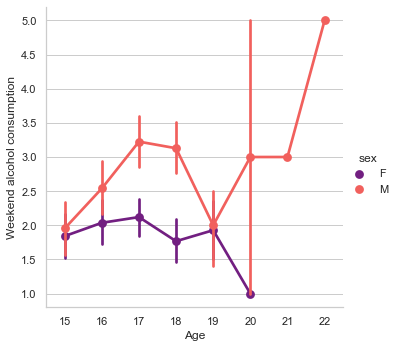

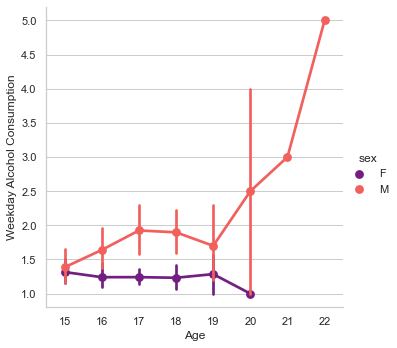

In [28]:
plot1 = sns.factorplot(x="age", y="Walc", data=df, palette='magma', hue='sex')
plot1.set(ylabel="Weekend alcohol consumption", xlabel="Age")

plot2 = sns.factorplot(x="age", y="Dalc", data=df, palette='magma', hue='sex')
plot2.set(ylabel="Weekday Alcohol Consumption", xlabel='Age')

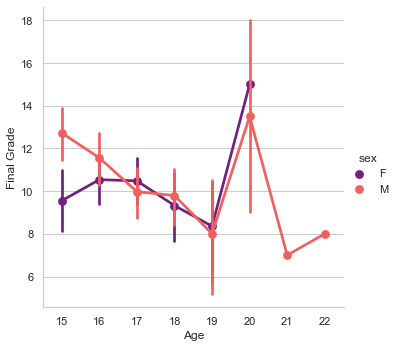

In [29]:
plot1 = sns.factorplot(x="age", y="G3", data=df, hue='sex', palette='magma')
plot1.set(ylabel="Final Grade", xlabel="Age")

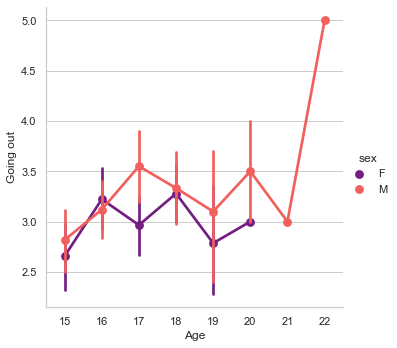

In [30]:
plot1 = sns.factorplot(x="age", y="goout", data=df, hue='sex', palette='magma')
plot1.set(ylabel="Going out", xlabel="Age")

[Text(0, 0.5, 'Final Grade'), Text(0.5, 0, 'Workday alcohol consumption')]

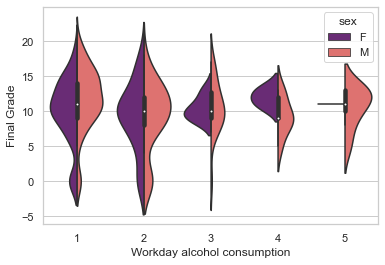

In [31]:
plot2= sns.violinplot(x="Dalc", y="G3", hue="sex",
                    data=df, palette="magma", split=True, dodge='false')
plot2.set(ylabel="Final Grade", xlabel="Workday alcohol consumption")

[Text(0, 0.5, 'Final Grade'), Text(0.5, 0, 'Weekend alcohol consumption')]

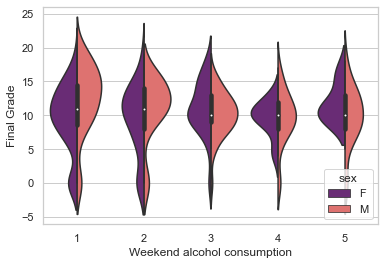

In [32]:
plot2= sns.violinplot(x="Walc", y="G3", hue="sex",
                    data=df, palette="magma", split=True, dodge='false')
plot2.set(ylabel="Final Grade", xlabel="Weekend alcohol consumption")

[Text(0, 0.5, 'Final Grade'), Text(0.5, 0, 'Weekend alcohol consumption')]

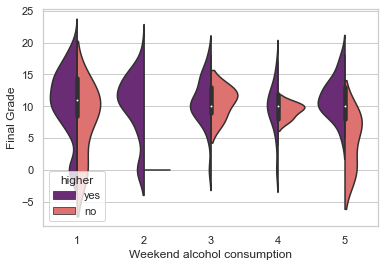

In [33]:
plot2= sns.violinplot(x="Walc", y="G3", hue="higher",
                    data=df, palette="magma", split=True, dodge='false')
plot2.set(ylabel="Final Grade", xlabel="Weekend alcohol consumption")

[Text(0, 0.5, 'Final Grade'), Text(0.5, 0, 'Weekday alcohol consumption')]

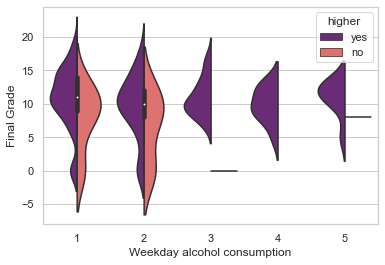

In [34]:
plot2= sns.violinplot(x="Dalc", y="G3", hue="higher",
                    data=df, palette="magma", split=True, dodge='false')
plot2.set(ylabel="Final Grade", xlabel="Weekday alcohol consumption")

In [35]:
dfobject=df.select_dtypes(['object'])
len(dfobject.columns)

17

In [36]:
def labelencode(columnname):
    df[columnname] = LabelEncoder().fit_transform(df[columnname])

In [37]:
for i in range(1,len(dfobject.columns)):
    labelencode(dfobject.columns[i])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    int32 
 2   age         395 non-null    int64 
 3   address     395 non-null    int32 
 4   famsize     395 non-null    int32 
 5   Pstatus     395 non-null    int32 
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    int32 
 9   Fjob        395 non-null    int32 
 10  reason      395 non-null    int32 
 11  guardian    395 non-null    int32 
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    int32 
 16  famsup      395 non-null    int32 
 17  paid        395 non-null    int32 
 18  activities  395 non-null    int32 
 19  nursery     395 non-null    int32 
 20  higher    

In [39]:
#Dropping school name for modelling 
df1 = df.drop(['school'], axis = 1)

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [41]:
X = df1.drop('G3', 1)
y = df1['G3']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 100)

classifiers = [['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['LogisticRegression :', LogisticRegression(max_iter=500)],
               ['Neural Network :', MLPClassifier()],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()]]

predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))

DecisionTree : 0.2857142857142857
RandomForest : 0.4957983193277311
Naive Bayes : 0.2689075630252101
KNeighbours : 0.3025210084033613
SVM : 0.226890756302521
LogisticRegression : 0.3277310924369748
Neural Network : 0.3445378151260504
ExtraTreesClassifier : 0.40336134453781514
AdaBoostClassifier : 0.2773109243697479
GradientBoostingClassifier:  0.4789915966386555


In [43]:
new = df[['G3','failures','Dalc', 'Walc', 'absences', 'famrel', 'health', 'goout', 'G1']]

In [44]:
new.describe()

,G3,failures,Dalc,Walc,absences,famrel,health,goout,G1
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,10.415190,0.334177,1.481013,2.291139,5.708861,3.944304,3.554430,3.108861,10.908861
std,4.581443,0.743651,0.890741,1.287897,8.003096,0.896659,1.390303,1.113278,3.319195
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000
25%,8.000000,0.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,8.000000
50%,11.000000,0.000000,1.000000,2.000000,4.000000,4.000000,4.000000,3.000000,11.000000
75%,14.000000,0.000000,2.000000,3.000000,8.000000,5.000000,5.000000,4.000000,13.000000
max,20.000000,3.000000,5.000000,5.000000,75.000000,5.000000,5.000000,5.000000,19.000000


In [45]:
U = new.drop('G3', 1)
V = new['G3']

In [51]:
U_train, U_test, V_train, V_test = train_test_split(U,V,test_size = 0.30, random_state = 100)

classifiers = [['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['LogisticRegression :', LogisticRegression(max_iter=500)],
               ['Neural Network :', MLPClassifier()],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()]]

predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = V_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(U_train, V_train)
    predictions = classifier.predict(U_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(V_test, predictions))

DecisionTree : 0.2184873949579832
RandomForest : 0.2857142857142857
Naive Bayes : 0.25210084033613445
KNeighbours : 0.2184873949579832
SVM : 0.33613445378151263
LogisticRegression : 0.3445378151260504
Neural Network : 0.31092436974789917
ExtraTreesClassifier : 0.2184873949579832
AdaBoostClassifier : 0.2605042016806723
GradientBoostingClassifier:  0.25210084033613445


In [53]:
new = df[['G3','failures','G1', 'G2']]

In [54]:
C = new.drop('G3', 1)
D = new['G3']

In [55]:
C_train, C_test, D_train, D_test = train_test_split(C,D,test_size = 0.30, random_state = 100)

classifiers = [['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['LogisticRegression :', LogisticRegression(max_iter=500)],
               ['Neural Network :', MLPClassifier()],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()]]

predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = D_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(C_train, D_train)
    predictions = classifier.predict(C_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(D_test, predictions))

DecisionTree : 0.453781512605042
RandomForest : 0.4957983193277311
Naive Bayes : 0.3865546218487395
KNeighbours : 0.42016806722689076
SVM : 0.5042016806722689
LogisticRegression : 0.5126050420168067
Neural Network : 0.3025210084033613
ExtraTreesClassifier : 0.4369747899159664
AdaBoostClassifier : 0.2773109243697479
GradientBoostingClassifier:  0.46218487394957986


In [49]:
# In these model I tried to see if weekend and weekly alcohol consumption is a good predictor of final grades 
# in a maths class.Logistic regression seems to be the best model among the bunch.SVM is also very close.
# Based on my analysis, alcohol consumption doesn't actually influence the final grades that much.
# Naturally, past failures and grades in first and second exams are better predictors of a student's final grade.
# More observations will most likely boost up the accuracy.